In [1]:
import os, random, shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from glob import glob
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from PIL import Image 

print('a')

a


In [2]:
path_train_new = os.path.join('./data/train_by_category_ver2')

train_list = glob(os.path.join(path_train_new, '*', '*.jpg'))

print(len(train_list))

dir_list = sorted(glob(os.path.join(path_train_new, '*')))

print(dir_list)

train_dir = './data/train_by_category_ver2'

tmplist = []
for i in dir_list:
    tmplist.append(i[30:])

print(tmplist)

63196
['./data/train_by_category_ver2/cardigan', './data/train_by_category_ver2/coat', './data/train_by_category_ver2/dress', './data/train_by_category_ver2/hat', './data/train_by_category_ver2/jacket', './data/train_by_category_ver2/jumpsuit', './data/train_by_category_ver2/pants', './data/train_by_category_ver2/shirt, blouse', './data/train_by_category_ver2/shoe', './data/train_by_category_ver2/shorts', './data/train_by_category_ver2/skirt', './data/train_by_category_ver2/tights, stockings', './data/train_by_category_ver2/top, t-shirt, sweatshirt']
['cardigan', 'coat', 'dress', 'hat', 'jacket', 'jumpsuit', 'pants', 'shirt, blouse', 'shoe', 'shorts', 'skirt', 'tights, stockings', 'top, t-shirt, sweatshirt']


In [3]:
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

batch_size=20

# classes=[str(x) for x in range(len(dir_list))]
classes = tmplist

print(classes)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=classes, 
    target_size=(299,299),
    batch_size=batch_size, 
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=classes,
    target_size=(299,299),
    batch_size=batch_size, 
    class_mode='categorical',
    subset='validation')

nr_of_classes = len(train_generator.class_indices)
print(nr_of_classes)

['cardigan', 'coat', 'dress', 'hat', 'jacket', 'jumpsuit', 'pants', 'shirt, blouse', 'shoe', 'shorts', 'skirt', 'tights, stockings', 'top, t-shirt, sweatshirt']
Found 50558 images belonging to 13 classes.
Found 12638 images belonging to 13 classes.
13


x_data shape :  (20, 299, 299, 3)
t_data shape :  (20, 13)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


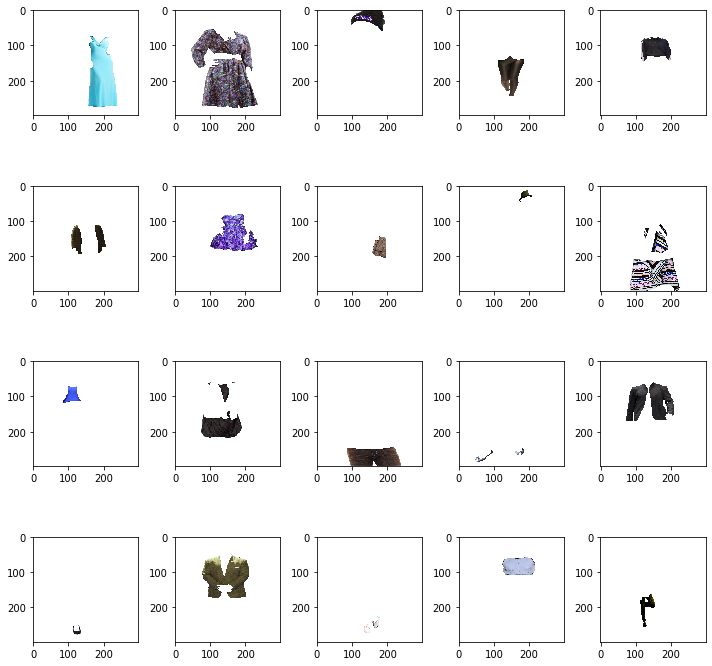

In [4]:
for x_data, t_data in train_generator:
    print('x_data shape : ', x_data.shape) # (20,299,299,3)
    print('t_data shape : ', t_data.shape) # (20,)
    break;

fig = plt.figure(figsize=(10,10))
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))
    
for x_data, t_data in train_generator:
    for idx, img_data in enumerate(x_data): # idx => 0~19 , img_data =>(150,150,3)
        axs[idx].imshow(img_data)
    print(t_data)
    break;
    
fig.tight_layout()
plt.show()


In [5]:

callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',  # 검증 정확도 모니터링
                                                   patience=5),             # 1 epoch보다 더 길게 정확도 향상되지 않으면 훈련 중지
                  
                  tf.keras.callbacks.ModelCheckpoint(filepath='./classifier_category_model_EfficientNetB3_1209.h5',
                                                     monitor='val_loss',    # 검증 loss 모니터링
                                                     save_best_only=True),  # 가장 좋은 모델을 저장
                  
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',  # 검증 loss 모니터링
                                                      factor=0.1,           # 콜백 호출시 학습률 10배로 줄임
                                                      patience=5)]          # 검증손실이 해당 epoch만큼 좋아지지 않으면 콜백 호출

In [24]:

import efficientnet.tfkeras as efn
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

input_layer = Input(shape=(299, 299, 3), name='input_layer')  

pretrained_model = efn.EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_shape=(299,299,3),    
    input_tensor=input_layer
)

pretrained_model.trainable = False

x = pretrained_model.output

x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(13, activation='softmax')(x)


model = Model(inputs=input_layer, outputs=x)

print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 150, 150, 40) 1080        input_layer[0][0]                
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 150, 150, 40) 160         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 150, 150, 40) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [26]:
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit(train_generator,
                    steps_per_epoch=500,
                    epochs=20,
                    callbacks=callbacks_list,
                    validation_data=validation_generator,
                    validation_steps=50)
                    
# (len(train_list)*0.8)/batch_size
# (len(train_list)*0.2)/batch_size

Epoch 1/20
500/500 [==============================] - 504s 1s/step - loss: 1.2831 - accuracy: 0.5764 - val_loss: 0.8690 - val_accuracy: 0.6950 - lr: 0.0010
Epoch 2/20
500/500 [==============================] - 483s 967ms/step - loss: 1.0453 - accuracy: 0.6408 - val_loss: 0.8744 - val_accuracy: 0.6880 - lr: 0.0010
Epoch 3/20
500/500 [==============================] - 478s 956ms/step - loss: 1.0005 - accuracy: 0.6564 - val_loss: 0.8485 - val_accuracy: 0.7060 - lr: 0.0010
Epoch 4/20
500/500 [==============================] - 484s 967ms/step - loss: 0.9605 - accuracy: 0.6728 - val_loss: 0.7409 - val_accuracy: 0.7380 - lr: 0.0010
Epoch 5/20
500/500 [==============================] - 467s 934ms/step - loss: 0.9458 - accuracy: 0.6732 - val_loss: 0.7641 - val_accuracy: 0.7580 - lr: 0.0010
Epoch 6/20
500/500 [==============================] - 476s 951ms/step - loss: 0.8990 - accuracy: 0.6930 - val_loss: 0.7354 - val_accuracy: 0.7440 - lr: 0.0010
Epoch 7/20
500/500 [=============================

In [ ]:
# 기학습 된 모델 불러오기
model = tf.keras.models.load_model('./classifier_category_model_EfficientNetB3_1209.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


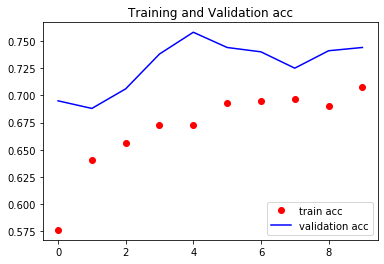

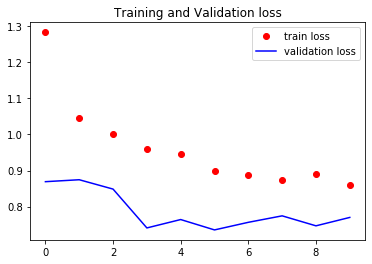

In [28]:
print(history.history.keys())

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_acc, 'bo', color='r', label='train acc')
plt.plot(val_acc, 'b', color='b', label='validation acc')
plt.title('Training and Validation acc')
plt.legend()
plt.show()

plt.plot(train_loss, 'bo', color='r', label='train loss')
plt.plot(val_loss, 'b', color='b', label='validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()